In [1]:
# Dependencies
import requests as req
import json
import datetime
import matplotlib.pyplot as plt
#from citipy import citipy 
from matplotlib.dates import DateFormatter
#import openweathermapy.core as ow
import random
import sys
import math
from collections import Counter
import csv
import pandas as pd
import numpy as np
import os
import time
#from census import Census

In [4]:
#Population POP - All People!!Total NOTE: Numbers in thousands.People as of March of the following year.
#POV -All People!!Below Poverty Level!!Number NOTE: Numbers in thousands. People as of March of the following year.
#PCTPOV - All People!!Below Poverty Level!!Percent

In [6]:
api_key = "a8f5dcc9f3f1f8036d61285797481af1be3d6a72"

In [55]:
url1= "https://api.census.gov/data/timeseries/poverty/histpov2?get=POP,POV,PCTPOV&time=2016&RACE=1&key="
query_url1 = url1 + api_key
poverty_data1 = req.get(query_url1).json()
#print(json.dumps(poverty_data1, indent=4, sort_keys=True))

poverty_usa_df = pd.DataFrame({"USA Population (thousands)": [poverty_data1[1][0]],
                               "USA population below the Poverty Level (thousands)":[poverty_data1[1][1]],
                               "USA population below the Poverty Level (%)":[poverty_data1[1][2]]})
poverty_usa_df.head()



,USA Population (thousands),USA population below the Poverty Level (%),USA population below the Poverty Level (thousands)
0,319911,12.7,40616


In [91]:
#SAEPOVALL_PT" - All ages in Poverty, Count Estimate Estimate.
#SAEPOVRTALL_PT - All ages in Poverty, Rate Estimate Estimate.
#SAEMHI_PT - SAEMHI_PT - Median Household Income Estimate Estimate.
url2 = "https://api.census.gov/data/timeseries/poverty/saipe?get=NAME,SAEPOVALL_PT,SAEPOVRTALL_PT,SAEMHI_PT&for=state:*&time=2016&key="
query_url2 = url2 + api_key
poverty_data2 = req.get(query_url2).json()
#print(json.dumps(poverty_data2, indent=4, sort_keys=True))

In [92]:
state=[]
ppl=[]
povrate=[]
income=[]
for x in poverty_data2:
    state.append(x[0])
    ppl.append(x[1])
    povrate.append(x[2])
    income.append(x[3])
    
del state[0]  
del ppl[0]
del povrate[0]
del income[0]
len(income)
poverty_data_df = pd.DataFrame({"State": state, "People in poverty (all ages)":ppl,"Poverty rate (all ages)": povrate,"Median Household Income (estimate)":income})
poverty_data_df.head()

,Median Household Income (estimate),People in poverty (all ages),Poverty rate (all ages),State
0,46309,814197,17.2,Alabama
1,76144,71916,9.9,Alaska
2,53481,1107153,16.4,Arizona
3,44406,497388,17.2,Arkansas
4,67715,5527621,14.4,California


In [87]:
poverty_data_df["Median Household Income (estimate in thousands of USD)"] = poverty_data_df["Median Household Income (estimate)"].astype(int)/1000

poverty_data_df2=poverty_data_df [["State", "Median Household Income (estimate in thousands of USD)","People in poverty (all ages)","Poverty rate (all ages)"]]
## Add in Employment Rate (Employment Count / Population)
#census_pd["Unemployment Rate"] = 100 * census_pd["Unemployment Count"].astype(int) / census_pd["Population"].astype(int)
#census_pd = census_pd[["Zipcode", "Population", "Unemployment Rate"]
#poverty_data_df["Median Household Income (estimate in thousands of USD)"] =
poverty_data_df2.head()

,State,Median Household Income (estimate in thousands of USD),People in poverty (all ages),Poverty rate (all ages)
0,Alabama,46.309,814197,17.2
1,Alaska,76.144,71916,9.9
2,Arizona,53.481,1107153,16.4
3,Arkansas,44.406,497388,17.2
4,California,67.715,5527621,14.4


In [88]:
#DP03_0005PE - Percent!!EMPLOYMENT STATUS!!Population 16 years and over!!In labor force!!Civilian labor force!!Unemployed
##DP02_0058PE - Percent!!EDUCATIONAL ATTAINMENT!!Population 25 years and over
#DP02_0058E - Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over
#DP02_0061E - Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!High school graduate (includes equivalency)
#DP02_0064E - 	Percent!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Bachelor's degree
url3= "https://api.census.gov/data/2016/acs/acs5/profile?get=NAME,DP02_0061PE,DP02_0064PE,DP03_0005PE&for=state:*&key="
query_url3 = url3 + api_key
education_data = req.get(query_url3).json()
#print(json.dumps(education_data, indent=4, sort_keys=True))

In [89]:
highschool=[]
bachelor=[]
unemployed=[]
state=[]
for x in education_data:
    state.append(x[0])
    highschool.append(x[1])
    bachelor.append(x[2])
    unemployed.append(x[3])
   
    
    
del highschool[0]  
del bachelor[0]
del unemployed[0]
del state[0]
#Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!High school graduate (includes equivalency)
#DP02_0064E - 	Percent!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Bachelor's degree
#DP03_0005PE - Percent!!EMPLOYMENT STATUS!!Population 16 years and over!!In labor force!!Civilian labor force!!Unemployed
education_data_df = pd.DataFrame({"State":state,"Graduated from High School, % (25 years and over)": highschool, 
                                  "Graduated from Bachelor's degree,% (25 years and over)":bachelor,
                                  "Unemployed, % (16 years and over in labor force)": unemployed})
education_data_df.head()                                 

,"Graduated from Bachelor's degree,% (25 years and over)","Graduated from High School, % (25 years and over)",State,"Unemployed, % (16 years and over in labor force)"
0,15.1,31.0,Alabama,4.8
1,18.4,27.7,Alaska,5.3
2,17.5,24.3,Arizona,4.7
3,13.9,34.7,Arkansas,4.0
4,20.1,20.6,California,5.5


In [95]:
# Merge the two data sets along "State"
edu_pov_data = pd.merge(poverty_data_df2, education_data_df, how="right", on=["State", "State"])

# Save the revised Data Frame as a csv
edu_pov_data.to_csv("edu_pov_data.csv", encoding="utf-8", index=False)

# Visualize
edu_pov_data

,State,Median Household Income (estimate in thousands of USD),People in poverty (all ages),Poverty rate (all ages),"Graduated from Bachelor's degree,% (25 years and over)","Graduated from High School, % (25 years and over)","Unemployed, % (16 years and over in labor force)"
0,Alabama,46.309,814197,17.2,15.1,31.0,4.8
1,Alaska,76.144,71916,9.9,18.4,27.7,5.3
2,Arizona,53.481,1107153,16.4,17.5,24.3,4.7
3,Arkansas,44.406,497388,17.2,13.9,34.7,4.0
4,California,67.715,5527621,14.4,20.1,20.6,5.5
5,Colorado,65.718,598378,11,24.4,21.7,4.0
6,Connecticut,73.380,342171,9.9,21.3,27.3,5.3
7,Delaware,62.112,109592,11.8,18.1,31.1,4.5
8,District of Columbia,74.093,119778,18.5,23.4,18.0,6.0
9,Florida,50.857,2986237,14.8,17.8,29.2,4.9


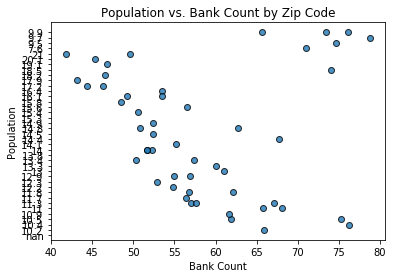

In [98]:
# Build a scatter plot for each data type
plt.scatter(edu_pov_data["Median Household Income (estimate in thousands of USD)"], 
           edu_pov_data["Poverty rate (all ages)"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Zip Codes")

# Incorporate the other graph properties
plt.title("Population vs. Bank Count by Zip Code")
plt.ylabel("Population")
plt.xlabel("Bank Count")
#plt.grid(True)
#plt.xlim([-2.5, 202])
#plt.ylim([-2.5, 110000])

# Save the figure
#plt.savefig("output_analysis/Population_BankCount.png")

# Show plot
plt.show()

In [ ]:
# Build a scatter plot for each data type
plt.scatter(edu_pov_data["Unemployed, % (16 years and over in labor force)"], 
           edu_pov_data["Poverty rate (all ages)"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Zip Codes")

# Incorporate the other graph properties
plt.title("Population vs. Bank Count by Zip Code")
plt.ylabel("Population")
plt.xlabel("Bank Count")
#plt.grid(True)
#plt.xlim([-2.5, 202])
#plt.ylim([-2.5, 110000])

# Save the figure
#plt.savefig("output_analysis/Population_BankCount.png")

# Show plot
plt.show()